# 3.1 CNN Fundamentals: Convolutions, Pooling, and More

Convolutional Neural Networks (CNNs) are the foundation of modern computer vision. They excel at extracting spatial features from images and are used in everything from image classification to object detection and segmentation.

## Learning Objectives

- Understand the basic building blocks of CNNs: convolutions, pooling, and activation functions.
- Visualize how convolutions and pooling work.
- Implement a simple CNN for image classification using TensorFlow and PyTorch.
- Discuss best practices and professional tips for real-world CNN development.

---

## What is a Convolution?

A convolution is a mathematical operation that extracts features from input data (such as images) by sliding a small filter (kernel) over the input and computing dot products.

- **Kernel/Filter**: Small matrix (e.g., 3x3) that detects patterns (edges, textures, etc.)
- **Stride**: Step size for moving the filter
- **Padding**: Adding zeros around the input to control output size

![Convolution Example](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

*Figure: Example of a 3x3 convolution with padding*

**Intuition:**
- Early layers detect simple features (edges, corners)
- Deeper layers detect complex patterns (shapes, objects)

---

## What is Pooling?

Pooling is a downsampling operation that reduces the spatial size of feature maps, making the network more robust and efficient.

- **Max Pooling**: Takes the maximum value in each window (e.g., 2x2)
- **Average Pooling**: Takes the average value in each window

Pooling helps:
- Reduce computation and memory
- Make features more invariant to small translations

## Activation Functions in CNNs

Activation functions introduce non-linearity, allowing CNNs to learn complex patterns.

- **ReLU (Rectified Linear Unit)**: Most common, fast and effective
- **Others**: Sigmoid, Tanh, Leaky ReLU, etc.

**Why use activation functions?**
- Without them, the network would be a linear function and could not learn complex representations.

---

## The CIFAR-10 Dataset

CIFAR-10 is a widely used benchmark for image classification. It consists of 60,000 color images (32x32 pixels) in 10 classes (airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).

Let's load and visualize some samples.

2025-08-06 17:44:12.470059: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-06 17:44:12.480037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754513052.491491  563319 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754513052.495039  563319 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754513052.504094  563319 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

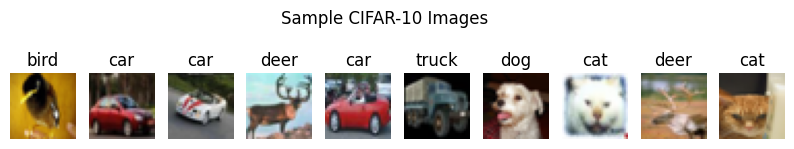

In [1]:
# Load and visualize CIFAR-10 dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx])
    plt.axis('off')
    plt.title(class_names[y_train[idx][0]])
plt.suptitle('Sample CIFAR-10 Images')
plt.show()

---

## Building a Simple CNN in TensorFlow

Let's implement a basic CNN for CIFAR-10 classification using TensorFlow/Keras. We'll use convolutional, pooling, and dense layers.

Epoch 1/10
391/391 - 6s - 16ms/step - accuracy: 0.4127 - loss: 1.6383 - val_accuracy: 0.5250 - val_loss: 1.3472
Epoch 2/10
391/391 - 6s - 15ms/step - accuracy: 0.5459 - loss: 1.2888 - val_accuracy: 0.5641 - val_loss: 1.2426
Epoch 3/10
391/391 - 6s - 15ms/step - accuracy: 0.5955 - loss: 1.1599 - val_accuracy: 0.6180 - val_loss: 1.1023
Epoch 4/10
391/391 - 6s - 14ms/step - accuracy: 0.6255 - loss: 1.0752 - val_accuracy: 0.6310 - val_loss: 1.0666
Epoch 5/10
391/391 - 6s - 14ms/step - accuracy: 0.6481 - loss: 1.0135 - val_accuracy: 0.6451 - val_loss: 1.0214
Epoch 6/10
391/391 - 6s - 15ms/step - accuracy: 0.6669 - loss: 0.9660 - val_accuracy: 0.6544 - val_loss: 0.9895
Epoch 7/10
391/391 - 6s - 15ms/step - accuracy: 0.6784 - loss: 0.9293 - val_accuracy: 0.6525 - val_loss: 0.9923
Epoch 8/10
391/391 - 6s - 14ms/step - accuracy: 0.6918 - loss: 0.8897 - val_accuracy: 0.6696 - val_loss: 0.9697
Epoch 9/10
391/391 - 6s - 15ms/step - accuracy: 0.7048 - loss: 0.8550 - val_accuracy: 0.6800 - val_loss:

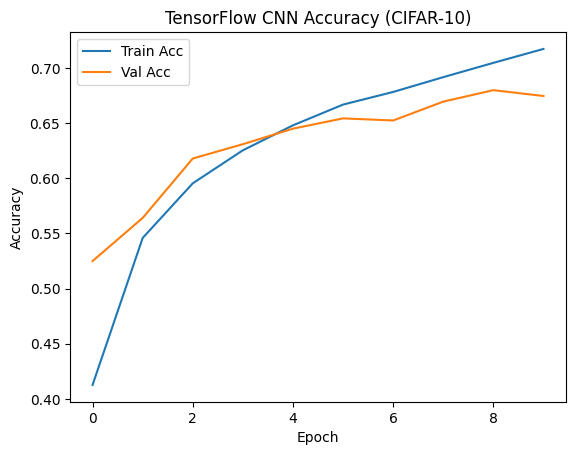

In [3]:
# TensorFlow: Simple CNN for CIFAR-10
import tensorflow as tf

x_train_norm = x_train.astype('float32') / 255.
x_test_norm = x_test.astype('float32') / 255.
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train_cat, epochs=10, batch_size=128, validation_data=(x_test_norm, y_test_cat), verbose=2)

# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('TensorFlow CNN Accuracy (CIFAR-10)')
plt.legend()
plt.show()

---

## Building a Simple CNN in Pytorch

Let's implement a basic CNN for CIFAR-10 classification using Pytorch. We'll use convolutional, pooling, and dense layers.

100%|██████████| 170M/170M [00:55<00:00, 3.07MB/s] 
/media/kmom/Data/github/kmom88/zero-to-hero-AI/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch 1: Train acc=0.4691, Test acc=0.5585
Epoch 2: Train acc=0.6080, Test acc=0.6301
Epoch 3: Train acc=0.6654, Test acc=0.6706
Epoch 4: Train acc=0.7002, Test acc=0.6771
Epoch 5: Train acc=0.7261, Test acc=0.6940
Epoch 6: Train acc=0.7481, Test acc=0.6829
Epoch 7: Train acc=0.7673, Test acc=0.7154
Epoch 8: Train acc=0.7831, Test acc=0.7150
Epoch 9: Train acc=0.7993, Test acc=0.7111
Epoch 10: Train acc=0.8168, Test acc=0.7100


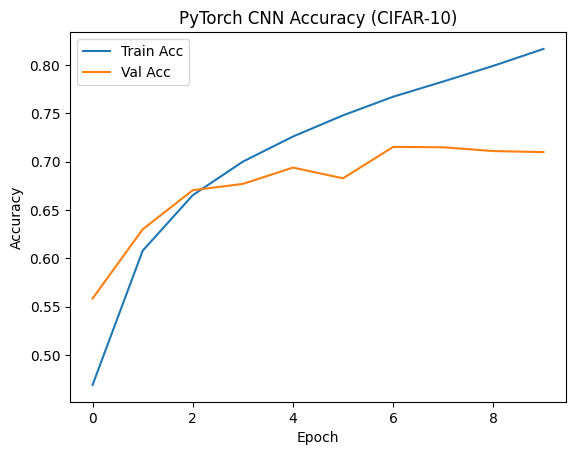

In [4]:
# PyTorch: Simple CNN for CIFAR-10
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_accs, val_accs = [], []
for epoch in range(10):
    model.train()
    correct, total = 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        preds = out.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    train_accs.append(correct/total)
    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            preds = out.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_accs.append(correct/total)
    print(f"Epoch {epoch+1}: Train acc={train_accs[-1]:.4f}, Test acc={val_accs[-1]:.4f}")

import matplotlib.pyplot as plt
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('PyTorch CNN Accuracy (CIFAR-10)')
plt.legend()
plt.show()

---

## Summary and Professional Tips

- CNNs are the backbone of computer vision, capable of learning hierarchical features from images.
- Use convolutional and pooling layers to extract and downsample features.
- Normalize and augment data for better generalization.
- Monitor training and validation accuracy to detect overfitting.
- For professional projects, modularize code, use callbacks (early stopping, checkpoints), and leverage GPU acceleration.
- Explore advanced architectures (ResNet, EfficientNet) and transfer learning for state-of-the-art results.

---